# Machine learning for Bioinformatics

In [1]:
import numpy as np
import pandas as pd

In [2]:
samples = pd.read_csv("http://139.91.190.186/tei/bioinformatics/genes.txt", sep = "\t")

In [3]:
samples

,Gene,GastricCancer,GastricCancer.1,GastricCancer.2,GastricCancer.3,GastricCancer.4,GastricCancer.5,GastricCancer.6,GastricCancer.7,GastricCancer.8,...,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Normal.7,Normal.8,Normal.9
0,ILMN_1343295,11.0,10.9,11.4,11.4,11.5,11.6,12.0,11.4,12.0,...,9.1,11.2,11.1,10.0,9.9,11.4,10.2,10.2,11.0,10.7
1,ILMN_1651210,5.2,5.5,5.2,5.3,5.2,5.3,5.3,5.4,5.3,...,5.3,5.4,5.2,5.3,5.5,5.4,5.5,5.4,5.3,5.1
2,ILMN_1651228,13.9,13.6,13.7,13.9,13.8,13.9,13.4,13.7,13.6,...,13.3,13.8,14.2,13.7,13.8,14.0,13.7,13.6,13.8,13.7
3,ILMN_1651229,7.5,8.0,7.8,7.4,7.3,7.6,6.8,7.3,7.9,...,8.2,6.9,7.1,7.0,7.1,7.7,7.7,7.5,7.2,7.6
4,ILMN_1651235,5.4,5.3,5.4,5.3,5.4,5.5,5.3,5.3,5.3,...,5.5,5.4,5.4,5.4,5.3,5.4,5.3,5.4,5.4,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26253,ILMN_2415911,7.0,7.0,7.3,7.3,7.2,7.2,7.2,7.8,7.3,...,6.6,6.8,7.0,6.8,7.0,7.1,6.7,6.9,7.5,6.9
26254,ILMN_2415926,7.9,7.7,8.9,7.5,7.6,8.6,7.7,7.5,7.9,...,6.5,7.3,7.4,7.0,7.0,7.1,6.8,7.6,7.6,7.3
26255,ILMN_2415949,7.6,7.4,7.6,7.0,7.3,8.3,8.2,7.4,7.7,...,7.5,7.5,7.3,7.2,7.3,7.9,7.5,7.4,7.5,7.3
26256,ILMN_2415979,12.7,13.3,12.2,11.8,12.3,12.4,12.1,11.7,11.9,...,13.9,12.4,12.9,13.0,12.6,11.2,13.4,11.8,10.2,12.6


In [4]:
samples.T

,0,1,2,3,4,5,6,7,8,9,...,26248,26249,26250,26251,26252,26253,26254,26255,26256,26257
Gene,ILMN_1343295,ILMN_1651210,ILMN_1651228,ILMN_1651229,ILMN_1651235,ILMN_1651236,ILMN_1651237,ILMN_1651238,ILMN_1651254,ILMN_1651259,...,ILMN_2415748,ILMN_2415776,ILMN_2415786,ILMN_2415826,ILMN_2415898,ILMN_2415911,ILMN_2415926,ILMN_2415949,ILMN_2415979,ILMN_2416019
GastricCancer,11.0,5.2,13.9,7.5,5.4,5.4,6.6,5.3,12.6,5.6,...,10.6,5.6,6.8,5.5,8.2,7.0,7.9,7.6,12.7,6.0
GastricCancer.1,10.9,5.5,13.6,8.0,5.3,5.5,7.1,5.4,10.0,5.3,...,11.0,5.2,9.5,5.5,7.6,7.0,7.7,7.4,13.3,5.2
GastricCancer.2,11.4,5.2,13.7,7.8,5.4,5.5,6.4,5.1,10.8,5.4,...,10.1,5.9,5.9,5.6,7.6,7.3,8.9,7.6,12.2,6.3
GastricCancer.3,11.4,5.3,13.9,7.4,5.3,5.6,7.1,5.2,11.8,5.5,...,9.6,5.4,6.5,5.4,7.4,7.3,7.5,7.0,11.8,8.0
GastricCancer.4,11.5,5.2,13.8,7.3,5.4,5.6,6.8,5.3,11.5,5.4,...,9.2,5.5,7.5,5.5,8.1,7.2,7.6,7.3,12.3,5.5
GastricCancer.5,11.6,5.3,13.9,7.6,5.5,5.7,8.6,5.1,9.7,5.3,...,8.8,5.5,8.1,5.4,7.8,7.2,8.6,8.3,12.4,6.5
GastricCancer.6,12.0,5.3,13.4,6.8,5.3,5.5,7.8,5.4,9.6,5.4,...,8.7,5.3,7.5,5.4,8.1,7.2,7.7,8.2,12.1,5.4
GastricCancer.7,11.4,5.4,13.7,7.3,5.3,5.5,7.3,5.1,11.7,5.4,...,9.1,5.7,8.9,5.6,8.3,7.8,7.5,7.4,11.7,5.7
GastricCancer.8,12.0,5.3,13.6,7.9,5.3,5.7,8.2,5.3,10.6,5.4,...,8.8,6.1,7.1,5.5,7.4,7.3,7.9,7.7,11.9,5.6


### Στη μηχανική μαθηση τα δεδομενα εχουν στις στήλες τα features/genes

# Data Pre-processing

In [5]:
data = np.transpose(samples.iloc[:, 1:])

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,26248,26249,26250,26251,26252,26253,26254,26255,26256,26257
GastricCancer,11.0,5.2,13.9,7.5,5.4,5.4,6.6,5.3,12.6,5.6,...,10.6,5.6,6.8,5.5,8.2,7.0,7.9,7.6,12.7,6.0
GastricCancer.1,10.9,5.5,13.6,8.0,5.3,5.5,7.1,5.4,10.0,5.3,...,11.0,5.2,9.5,5.5,7.6,7.0,7.7,7.4,13.3,5.2
GastricCancer.2,11.4,5.2,13.7,7.8,5.4,5.5,6.4,5.1,10.8,5.4,...,10.1,5.9,5.9,5.6,7.6,7.3,8.9,7.6,12.2,6.3
GastricCancer.3,11.4,5.3,13.9,7.4,5.3,5.6,7.1,5.2,11.8,5.5,...,9.6,5.4,6.5,5.4,7.4,7.3,7.5,7.0,11.8,8.0
GastricCancer.4,11.5,5.2,13.8,7.3,5.4,5.6,6.8,5.3,11.5,5.4,...,9.2,5.5,7.5,5.5,8.1,7.2,7.6,7.3,12.3,5.5
GastricCancer.5,11.6,5.3,13.9,7.6,5.5,5.7,8.6,5.1,9.7,5.3,...,8.8,5.5,8.1,5.4,7.8,7.2,8.6,8.3,12.4,6.5
GastricCancer.6,12.0,5.3,13.4,6.8,5.3,5.5,7.8,5.4,9.6,5.4,...,8.7,5.3,7.5,5.4,8.1,7.2,7.7,8.2,12.1,5.4
GastricCancer.7,11.4,5.4,13.7,7.3,5.3,5.5,7.3,5.1,11.7,5.4,...,9.1,5.7,8.9,5.6,8.3,7.8,7.5,7.4,11.7,5.7
GastricCancer.8,12.0,5.3,13.6,7.9,5.3,5.7,8.2,5.3,10.6,5.4,...,8.8,6.1,7.1,5.5,7.4,7.3,7.9,7.7,11.9,5.6
GastricCancer.9,11.7,5.3,13.6,7.2,5.3,5.6,6.6,5.3,11.5,5.4,...,9.0,5.3,7.5,5.5,8.2,6.9,7.1,7.9,11.7,6.4


In [7]:
genes = np.transpose(samples.iloc[:, 0])

In [8]:
genes

0        ILMN_1343295
1        ILMN_1651210
2        ILMN_1651228
3        ILMN_1651229
4        ILMN_1651235
             ...     
26253    ILMN_2415911
26254    ILMN_2415926
26255    ILMN_2415949
26256    ILMN_2415979
26257    ILMN_2416019
Name: Gene, Length: 26258, dtype: object

In [9]:
labels = samples.columns

In [10]:
labels

Index(['Gene', 'GastricCancer', 'GastricCancer.1', 'GastricCancer.2',
       'GastricCancer.3', 'GastricCancer.4', 'GastricCancer.5',
       'GastricCancer.6', 'GastricCancer.7', 'GastricCancer.8',
       'GastricCancer.9', 'Normal', 'Normal.1', 'Normal.2', 'Normal.3',
       'Normal.4', 'Normal.5', 'Normal.6', 'Normal.7', 'Normal.8', 'Normal.9'],
      dtype='object')

In [11]:
labels = samples.columns[1:]

In [12]:
labels

Index(['GastricCancer', 'GastricCancer.1', 'GastricCancer.2',
       'GastricCancer.3', 'GastricCancer.4', 'GastricCancer.5',
       'GastricCancer.6', 'GastricCancer.7', 'GastricCancer.8',
       'GastricCancer.9', 'Normal', 'Normal.1', 'Normal.2', 'Normal.3',
       'Normal.4', 'Normal.5', 'Normal.6', 'Normal.7', 'Normal.8', 'Normal.9'],
      dtype='object')

In [13]:
for x in range(len(labels)):
    if labels[x].startswith("GastricCancer"):
        labels.values[x] = "GastricCancer"
    elif labels[x].startswith("Normal"):
        labels.values[x] = "Normal"
labels

Index(['GastricCancer', 'GastricCancer', 'GastricCancer', 'GastricCancer',
       'GastricCancer', 'GastricCancer', 'GastricCancer', 'GastricCancer',
       'GastricCancer', 'GastricCancer', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal'],
      dtype='object')

## How to split my data to Train and Test
Usually we split with 70%-80% train, and the rest are test

In [14]:
np.random.rand(3)

array([0.60403452, 0.70839404, 0.86095262])

In [15]:
split = 0.7

In [16]:
msk = np.random.rand(20) < 0.7

In [17]:
msk

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False])

In [18]:
~msk

array([False, False, False,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True])

In [19]:
trainingSet = data.loc[msk, :]

In [20]:
trainingSet

,0,1,2,3,4,5,6,7,8,9,...,26248,26249,26250,26251,26252,26253,26254,26255,26256,26257
GastricCancer,11.0,5.2,13.9,7.5,5.4,5.4,6.6,5.3,12.6,5.6,...,10.6,5.6,6.8,5.5,8.2,7.0,7.9,7.6,12.7,6.0
GastricCancer,10.9,5.5,13.6,8.0,5.3,5.5,7.1,5.4,10.0,5.3,...,11.0,5.2,9.5,5.5,7.6,7.0,7.7,7.4,13.3,5.2
GastricCancer,11.4,5.2,13.7,7.8,5.4,5.5,6.4,5.1,10.8,5.4,...,10.1,5.9,5.9,5.6,7.6,7.3,8.9,7.6,12.2,6.3
GastricCancer,11.6,5.3,13.9,7.6,5.5,5.7,8.6,5.1,9.7,5.3,...,8.8,5.5,8.1,5.4,7.8,7.2,8.6,8.3,12.4,6.5
GastricCancer,11.4,5.4,13.7,7.3,5.3,5.5,7.3,5.1,11.7,5.4,...,9.1,5.7,8.9,5.6,8.3,7.8,7.5,7.4,11.7,5.7
GastricCancer,12.0,5.3,13.6,7.9,5.3,5.7,8.2,5.3,10.6,5.4,...,8.8,6.1,7.1,5.5,7.4,7.3,7.9,7.7,11.9,5.6
GastricCancer,11.7,5.3,13.6,7.2,5.3,5.6,6.6,5.3,11.5,5.4,...,9.0,5.3,7.5,5.5,8.2,6.9,7.1,7.9,11.7,6.4
Normal,11.2,5.4,13.8,6.9,5.4,5.5,6.9,5.4,10.4,5.2,...,9.5,5.2,8.9,5.6,7.8,6.8,7.3,7.5,12.4,6.3
Normal,10.0,5.3,13.7,7.0,5.4,5.5,6.9,5.3,11.5,5.3,...,10.5,5.7,9.0,5.6,7.8,6.8,7.0,7.2,13.0,6.1
Normal,9.9,5.5,13.8,7.1,5.3,5.5,7.6,5.1,11.3,5.4,...,10.6,5.4,9.4,5.5,7.1,7.0,7.0,7.3,12.6,5.8


In [21]:
testSet = data.loc[~msk, :]

In [22]:
testSet

,0,1,2,3,4,5,6,7,8,9,...,26248,26249,26250,26251,26252,26253,26254,26255,26256,26257
GastricCancer,11.4,5.3,13.9,7.4,5.3,5.6,7.1,5.2,11.8,5.5,...,9.6,5.4,6.5,5.4,7.4,7.3,7.5,7.0,11.8,8.0
GastricCancer,11.5,5.2,13.8,7.3,5.4,5.6,6.8,5.3,11.5,5.4,...,9.2,5.5,7.5,5.5,8.1,7.2,7.6,7.3,12.3,5.5
GastricCancer,12.0,5.3,13.4,6.8,5.3,5.5,7.8,5.4,9.6,5.4,...,8.7,5.3,7.5,5.4,8.1,7.2,7.7,8.2,12.1,5.4
Normal,9.1,5.3,13.3,8.2,5.5,5.5,6.7,5.4,11.5,5.4,...,12.5,6.8,9.9,5.6,7.6,6.6,6.5,7.5,13.9,7.2
Normal,11.1,5.2,14.2,7.1,5.4,5.5,6.3,5.2,11.0,5.5,...,10.1,5.7,7.4,5.3,8.3,7.0,7.4,7.3,12.9,5.8
Normal,11.4,5.4,14.0,7.7,5.4,5.5,7.5,5.4,10.4,5.3,...,8.8,5.5,7.8,5.6,8.1,7.1,7.1,7.9,11.2,8.2
Normal,10.2,5.5,13.7,7.7,5.3,5.5,5.7,5.4,10.6,5.2,...,10.9,5.4,9.2,5.6,8.4,6.7,6.8,7.5,13.4,5.4
Normal,10.2,5.4,13.6,7.5,5.4,5.5,6.2,5.2,11.7,5.5,...,10.4,5.8,8.1,5.7,8.1,6.9,7.6,7.4,11.8,6.0
Normal,10.7,5.1,13.7,7.6,5.3,5.6,7.2,5.2,10.9,5.4,...,10.4,5.8,7.7,5.5,8.2,6.9,7.3,7.3,12.6,5.7


In [23]:
trainingClass = labels[msk]
testClass = labels[~msk]

In [24]:
trainingClass

Index(['GastricCancer', 'GastricCancer', 'GastricCancer', 'GastricCancer',
       'GastricCancer', 'GastricCancer', 'GastricCancer', 'Normal', 'Normal',
       'Normal', 'Normal'],
      dtype='object')

In [25]:
testClass

Index(['GastricCancer', 'GastricCancer', 'GastricCancer', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal'],
      dtype='object')

# Create my own K-NN algorithm

In [26]:
import math

In [27]:
def euclidean_distance(sample1, sample2):
    distance=0
    for x in range(len(sample1)):
        distance += pow(sample1[x] - sample2[x], 2)
    return math.sqrt(distance)

In [28]:
euclidean_distance(trainingSet.iloc[1,:], testSet.iloc[1,:])

103.34321458132287

In [29]:
euclidean_distance(trainingSet.iloc[0,:], testSet.iloc[1,:])

88.89994375701724

In [30]:
def find_distances(test_index):
    ret = []
    for x in range(len(trainingSet)):
        tmp = euclidean_distance(trainingSet.iloc[x,:], testSet.iloc[test_index,:])
        ret.append(tmp)
    return ret

In [31]:
a = find_distances(0)

In [32]:
min(a)

90.5942051126942

In [33]:
a

[90.5942051126942,
 138.0860963312428,
 96.82644266935144,
 114.21930659919943,
 102.93624240276945,
 101.5932576503061,
 104.71518514523864,
 119.59899665131918,
 122.56308579667157,
 125.19868210169889,
 118.84544585301634]

In [34]:
trainingClass[5]

'GastricCancer'

In [35]:
testClass[0]

'GastricCancer'

In [36]:
a.index(min(a))

0

In [37]:
trainingClass[a.index(min(a))]

'GastricCancer'

In [38]:
def custom_knn(k, new_case_index):
    dist = find_distances(new_case_index)
    sorted_int = np.argsort(dist)
    my_labels = trainingClass[sorted_int]
    count =0
    for x in range(k):
        if my_labels[x] == "Normal":
            count += 1
    if count > (k / 2):
        predicted = "Normal"
    else:
        predicted = "GastricCancer"
    print("Index of test sample ", new_case_index, " predicted as:", predicted , " real class is:" ,testClass[new_case_index])

In [39]:
custom_knn(3, 0)

Index of test sample  0  predicted as: GastricCancer  real class is: GastricCancer


In [40]:
for x in range(len(testClass)):
    custom_knn(7, x)

Index of test sample  0  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  1  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  2  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  3  predicted as: Normal  real class is: Normal
Index of test sample  4  predicted as: Normal  real class is: Normal
Index of test sample  5  predicted as: Normal  real class is: Normal
Index of test sample  6  predicted as: Normal  real class is: Normal
Index of test sample  7  predicted as: Normal  real class is: Normal
Index of test sample  8  predicted as: Normal  real class is: Normal


# Use of Scikit-learn

## Create a K-NN classifier from SCikit-learn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [43]:
neigh.fit(trainingSet, trainingClass)

KNeighborsClassifier(n_neighbors=3)

In [44]:
pr = neigh.predict(testSet)

In [45]:
pr

array(['GastricCancer', 'GastricCancer', 'GastricCancer', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal'], dtype=object)

In [46]:
for x in range(len(testClass)):
        print("Index of test sample ",x , " predicted as:", pr[x] , " real class is:" ,testClass[x])

Index of test sample  0  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  1  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  2  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  3  predicted as: Normal  real class is: Normal
Index of test sample  4  predicted as: Normal  real class is: Normal
Index of test sample  5  predicted as: Normal  real class is: Normal
Index of test sample  6  predicted as: Normal  real class is: Normal
Index of test sample  7  predicted as: Normal  real class is: Normal
Index of test sample  8  predicted as: Normal  real class is: Normal


## Create a Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(trainingSet, trainingClass)

DecisionTreeClassifier()

In [50]:
predictedClass = clf.predict(testSet)

In [51]:
predictedClass

array(['GastricCancer', 'GastricCancer', 'GastricCancer', 'GastricCancer',
       'GastricCancer', 'Normal', 'GastricCancer', 'Normal',
       'GastricCancer'], dtype=object)

In [52]:
for x in range(len(testClass)):
        print("Index of test sample ",x , " predicted as:", predictedClass[x] , " real class is:" ,testClass[x])

Index of test sample  0  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  1  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  2  predicted as: GastricCancer  real class is: GastricCancer
Index of test sample  3  predicted as: GastricCancer  real class is: Normal
Index of test sample  4  predicted as: GastricCancer  real class is: Normal
Index of test sample  5  predicted as: Normal  real class is: Normal
Index of test sample  6  predicted as: GastricCancer  real class is: Normal
Index of test sample  7  predicted as: Normal  real class is: Normal
Index of test sample  8  predicted as: GastricCancer  real class is: Normal


In [53]:
from sklearn import tree
print(tree.export_text(clf, feature_names=genes.tolist()))

|--- ILMN_2312194 <= 9.85
|   |--- class: GastricCancer
|--- ILMN_2312194 >  9.85
|   |--- class: Normal



[Text(167.4, 163.07999999999998, 'X[24015] <= 9.85\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

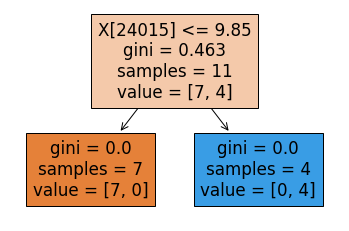

In [54]:
tree.plot_tree(clf, filled=True)

## Confusion Matrix

In [55]:
from sklearn import metrics

In [56]:
metrics.accuracy_score(testClass, predictedClass)

0.5555555555555556

In [57]:
metrics.confusion_matrix(testClass, predictedClass)

array([[3, 0],
       [4, 2]])